# Problem

Date: 25 June 2020

Time : 16:30

Main problem: Arrival-time estimation


### Problem statement: Umniah aims at estimating the arrival times of its employees..

- An appropriate holistic approach to solve this problem is "Profiling": building a profile/model that describes a person's behavior.

- Simple examples will demonstrate the concept below.

### Note:

I should point out that there are several ways to solve this problem and selecting an appropriate approach depends on some business related issues such as:

- Who the client is and why s/he needs this
- where this system will be deployed (the bigger system)
- The available data

### The profile/model: the probability of a delay in minutes (The prior*).
*That model is the back-pone for solving such problems.

## Employee 1: Long tail distribution

- This example tests the effectiveness of this method.
- A well know behavor is assumed (An employee who usually arrives on time: a standard delay 'Poisson'). 
- The arrival times were generated from a well-known model, then the  generated data were used to reconstruct the origional model

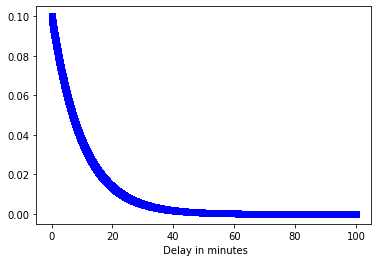

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random

lamb = 10
x = np.linspace(0, 100, 10000)
pdf = np.exp(-x/lamb)/lamb

plt.plot(x, pdf, 'bs')
pyplot.xlabel(" Delay in minutes")

plt.show()

In [7]:
#Generate arrival times from the distribution using MC method
y = -lamb*np.log(1 - random.rand(10000))

In [8]:
min(y)

0.003073138335181304

In [9]:
max(y)

87.50751387244725

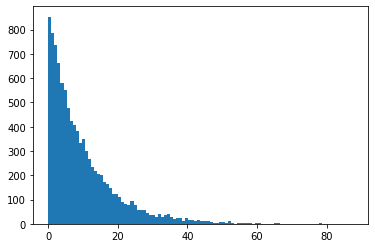

In [10]:
hist = plt.hist(y, bins=100)

Estimate the arrival time prior

(-0.02, 0.1)

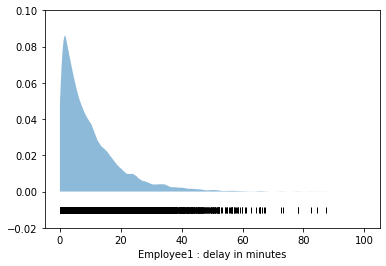

In [36]:
from sklearn.neighbors import KernelDensity

# instantiate and fit the KDE model
kde = KernelDensity(bandwidth=2, kernel='linear')
kde.fit(y[:, None])

# score_samples returns the log of the probability density
logprob = kde.score_samples(x[:, None])
yp = np.exp(logprob)

#plot
plt.fill_between(x, yp, alpha=0.5)
plt.plot(y, np.full_like(y, -0.01), '|k', markeredgewidth=1)
pyplot.xlabel("Employee1 : delay in minutes")
plt.ylim(-0.02, 0.1)

Evaluation: mean square error

In [37]:
print('MSE:',np.mean((pdf-yp)**2))

MSE: 1.0395537676094016e-05


## Employee 2: Actual distribution

An employee arrives 10 minutes late on average.
Only 100 records are available

In [49]:
# Generate from Poisson distribution
employee2_delay = random.poisson(lam=10, size=100)
employee2_delay

array([12,  9, 13,  7,  5,  6,  7,  8, 14,  9, 10, 10,  7, 10, 14, 10, 12,
        6,  6,  9, 10,  7, 16,  6, 13,  9, 12, 10,  6,  9, 11,  9, 11, 12,
        9,  7, 17, 10,  6, 10, 16,  9, 14, 12, 13,  7, 10, 14,  7,  9,  8,
       11, 14, 10, 15, 10,  8,  9,  6, 10,  9, 18, 11, 11, 14, 10, 10, 12,
       15, 13,  5, 12,  8, 12,  9,  7,  5,  9,  8,  5,  9, 12,  9, 10,  4,
       11, 11,  9,  9, 15,  8,  7, 10, 13,  7, 10, 13,  8, 17,  9])

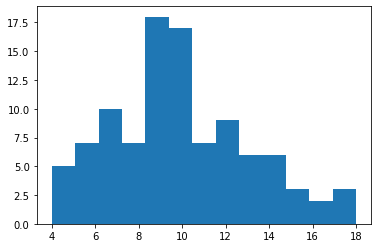

In [50]:
from matplotlib import pyplot
pyplot.hist(employee2_delay, bins=13)
pyplot.show()

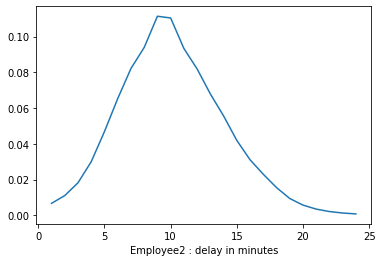

In [56]:
# fit density
sample = employee2_delay
model2 = KernelDensity(bandwidth=2, kernel='exponential')
sample = sample.reshape((len(sample), 1))
model2.fit(sample)


# sample probabilities for a range of outcomes
values = np.asarray([value for value in range(1, 25)])
values = values.reshape((len(values), 1))
probabilities = model2.score_samples(values)
probabilities = np.exp(probabilities)


# plot the histogram and pdf
pyplot.plot(values[:], probabilities)
pyplot.xlabel("Employee2 : delay in minutes")
pyplot.show()